# 1) Obtaining data and loading libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

df=pd.read_csv('kc_house_data.csv')

#Inital look at df
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [2]:
#Initial observations
    #df has 21597 rows and 21 colums with various data types
    #columns waterfront, view and yr_renovated have missing values

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# 2) Data cleaning + Data Exploration

## Dealing with missing values

In [4]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
#columns waterfront, view and yr_renovated have missing values

#YR_RENOVATED
print(df.yr_renovated.value_counts().head())

# 17011 entries have the value of '0', which seems to be a placeholder for the fact the house has never been renovated
# there are 3842 NaNs - I will change these into 'not renovated', as that is the overwhelming value
#I will later make this columns categorical and bin the values

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64


In [6]:
df.yr_renovated = df.yr_renovated.astype('str')
df.loc[df.yr_renovated == '0.0','yr_renovated'] = 'not renovated'
df.loc[df.yr_renovated == 'nan','yr_renovated'] = 'not renovated'

In [7]:
print(df.yr_renovated.isna().sum())

0


In [8]:
#VIEW
# this columns has 63 NaNs
# the overwhelming value in this column is 0 (19 422 out of 21 597)
# I will turn the missing values into '0'
# I will later make this columns categorical 

df.view.value_counts()
df.view = df.view.fillna(0.0)

In [9]:
#WATERFRONT
# overwhelming value: 0.0 (19075)
# NaNs = 2376
#For the sake of simplicty, I will drop this columns entirely as it will not provide much insight.
df = df.drop('waterfront',axis=1)

#While on it, I will also delete the date column, as we will not need that data
df = df.drop('date',axis=1)
#Now we have no obviuous missing values!
df.isna().sum()


id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Looking for placeholders

In [10]:
#checking for placeholders in individual columns
#I will later use scatter plots to check for other unusual values and outliers

for var in list(df.columns):
    print (df[var].value_counts())

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
3969300030    2
2560801222    2
3883800011    2
2228900270    2
251300110     2
5282200015    2
2787460720    2
5536100020    2
2568300045    2
8648900110    2
8910500150    2
2044500213    2
4222310010    2
8651402750    2
8820903380    2
4345000510    2
641900050     2
1823049202    2
8121100395    2
6308000010    2
1139600270    2
937000330     2
3293700496    2
4435000705    2
5430300171    2
             ..
9454200030    1
8857640710    1
7519001825    1
3992700130    1
7515000035    1
5608010980    1
475000510     1
4038300010    1
2770603522    1
2738640470    1
9238480020    1
9492500170    1
2607740100    1
880000189     1
7974200510    1
6815100095    1
2617300160    1
2768100545    1
3324069058    1
1931300035    1
1922000070    1
8165500110    1
7893808220    1
3333002440    1
3420069065    1
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420,

-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
-122.363     99
-122.288     98
-122.357     96
-122.284     95
-122.172     94
-122.365     94
-122.306     93
-122.346     93
-122.351     92
-122.304     92
-122.348     92
-122.299     92
-122.375     92
-122.295     91
-122.350     90
-122.285     90
-122.292     90
-122.352     89
-122.289     89
-122.298     88
-122.359     88
-122.384     87
-122.317     86
-122.316     86
-122.301     86
           ... 
-122.454      1
-121.835      1
-122.519      1
-122.469      1
-121.788      1
-121.891      1
-121.325      1
-122.447      1
-121.760      1
-122.514      1
-121.725      1
-121.716      1
-121.803      1
-122.499      1
-121.792      1
-122.512      1
-121.815      1
-121.359      1
-121.733      1
-121.711      1
-121.767      1
-121.480      1
-121.701      1
-122.479      1
-122.467      1
-121.403      1
-121.804      1
-121.726      1
-121.895      1
-121.893      1
Name: long, Length: 751,

In [11]:
#sqft_basement
# There are 454 '?' values in this dataset. That is a relatively small amount.
#I will first replace '?' with Nan
df.sqft_basement = df.sqft_basement.replace('?',np.nan)

#Now I will turn the columns into float and then replace the missing value with the median - which is 0!
df.sqft_basement = df.sqft_basement.astype('float64')
df.sqft_basement = df.sqft_basement.fillna(df.sqft_basement.median())

#I will make this column categorical and turn '0' into a category of "no basement"

In [12]:
df.sqft_basement.describe()

count    21597.000000
mean       285.716581
std        439.819830
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

## Checking columns types

In [13]:
#CHECKING COLUMN TYPES 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null object
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11), object(1)
memory usage: 3.1+ MB


In [14]:
# I will turn column zipcode into strings(objects) as they are categorical variables
df.zipcode = df.zipcode.astype('str')

#I will turn View into integer
df.view = df.view.astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null object
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(6), int64(11), object(2)
memory usage: 3.1+ MB


## Initial Data Exploration and Removing outliers

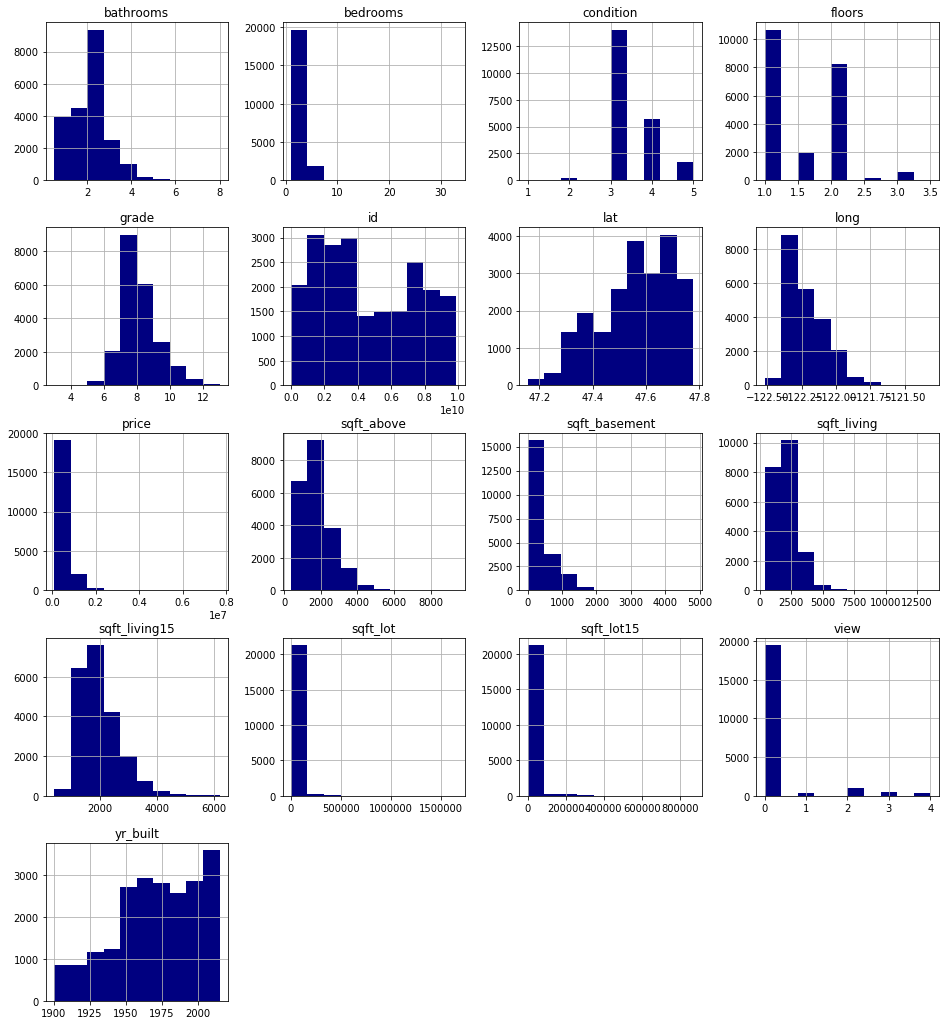

In [15]:
#QUICK VISUALISATIONS
df.hist(figsize=(16,18),color='navy');
# columns such as bedrooms, price, sqft_lot, sqft_above, sqft_basement and sqft_lot15 seem to have some outliers
# columns condition, floors, grade, bathrooms, view and bathrooms look like categorical variables


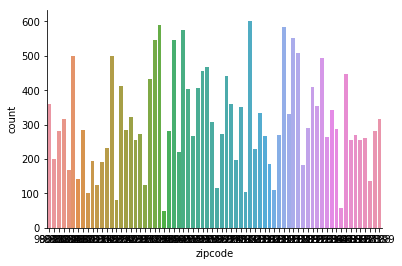

In [16]:
sns.countplot(df['zipcode'])
sns.despine();
#properties in zipocdes are not evenly distributed, but that was expected
#no zipcode category contains more than 600 houses

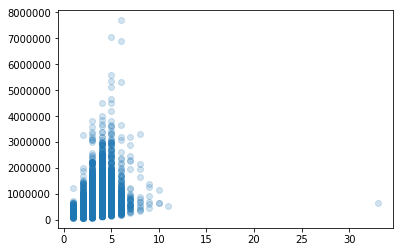

In [17]:
# after a quick look at different scatterplots, I have identified some outliers
plt.scatter(df.bedrooms,df.price, alpha = 0.2)
plt.show()

In [18]:
#looking for outliers
df.describe()
#there is a house with 33 bedrooms
#let's have a look at it
df.loc[df.bedrooms > 15] 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,640000.0,33,1.75,1620,6000,1.0,0,5,7,1040,580.0,1947,not renovated,98103,47.6878,-122.331,1330,4700


In [19]:
#I will remove this house from the dataset
df = df.drop([15856])

In [20]:
#also, there are 7 houses sold for more than $5 000 000
#let's have a look at them
df.loc[df.price > 5000000]
#as we can see, there are only two houses in that category, which are skewing our dataset
#median price: $450 000
#mean price: $540 296

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1162,1247600105,5110000.0,5,5.25,8010,45517,2.0,4,3,12,5990,2020.0,1999,not renovated,98033,47.6767,-122.211,3430,26788
1313,7558700030,5300000.0,6,6.00,7390,24829,2.0,0,4,12,5000,2390.0,1991,not renovated,98040,47.5631,-122.210,4320,24619
1446,8907500070,5350000.0,5,5.00,8000,23985,2.0,4,3,12,6720,1280.0,2009,not renovated,98004,47.6232,-122.220,4600,21750
3910,9808700762,7060000.0,5,4.50,10040,37325,2.0,2,3,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
4407,2470100110,5570000.0,5,5.75,9200,35069,2.0,0,3,13,6200,3000.0,2001,not renovated,98039,47.6289,-122.233,3560,24345
7245,6762700020,7700000.0,6,8.00,12050,27600,2.5,3,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
9245,9208900037,6890000.0,6,7.75,9890,31374,2.0,4,3,13,8860,1030.0,2001,not renovated,98039,47.6305,-122.240,4540,42730


In [21]:
#I will drop these houses from the dataset
df = df.drop([3910])
df = df.drop([7245])
df = df.drop([9245])

In [22]:
#dropping houses above $5 mil
df = df.drop([1162])
df = df.drop([1313])
df = df.drop([1446])
df = df.drop([4407])

In [23]:
#Outliers in sqft_living
df.loc[df.sqft_living > 8000]
#There are only 4 properties with sgft_living value above 8000 sqft
#The value of the largest property is $2,280,000
#I will remove this property from the dataset


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8085,1924059029,4670000.0,5,6.75,9640,13068,1.0,4,3,12,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454
12764,1225069038,2280000.0,7,8.00,13540,307752,3.0,4,3,12,9410,4130.0,1999,not renovated,98053,47.6675,-121.986,4850,217800
14542,2303900035,2890000.0,5,6.25,8670,64033,2.0,4,3,13,6120,2550.0,1965,not renovated,98177,47.7295,-122.372,4140,81021
18288,6072800246,3300000.0,5,6.25,8020,21738,2.0,0,3,11,8020,0.0,2001,not renovated,98006,47.5675,-122.189,4160,18969


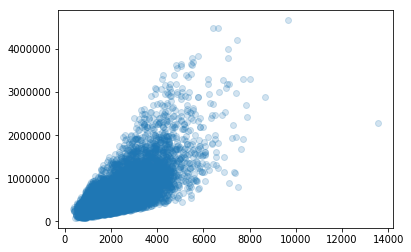

In [24]:
plt.scatter(df.sqft_living,df.price, alpha = 0.2)
plt.show()

In [25]:
df = df.drop([12764])
df = df.drop([8085])
df = df.drop([18288])
df = df.drop([14542])

In [26]:
#Basement
df.loc[df.sqft_basement > 3000]
# there are only 2 properties with basement larget than 3000 sqft
# I will remove them from the dataset

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10074,7767000060,1900000.0,5,4.25,6510,16471,2.0,3,4,11,3250,3260.0,1980,not renovated,98040,47.5758,-122.242,4480,16471
15468,624069108,3200000.0,4,3.25,7000,28206,1.0,4,4,12,3500,3500.0,1991,not renovated,98075,47.5928,-122.086,4913,14663


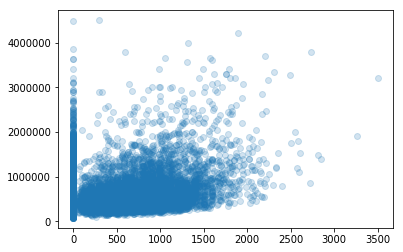

In [27]:
plt.scatter(df.sqft_basement,df.price, alpha = 0.2)
plt.show()

In [28]:
df = df.drop([10074])
df = df.drop([15468])

In [29]:
#sqft_lot
#there are only 4 properties with lots larget than 1 000 000 sqft
df.loc[df.sqft_lot > 1000000]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1717,1020069017,700000.0,4,1.00,1300,1651359,1.0,3,4,6,1300,0.0,1920,not renovated,98022,47.2313,-122.023,2560,425581
7640,2623069031,542500.0,5,3.25,3010,1074218,1.5,0,5,8,2010,1000.0,1931,not renovated,98027,47.4564,-122.004,2450,68825
7762,2323089009,855000.0,4,3.50,4030,1024068,2.0,0,3,10,4030,0.0,2006,not renovated,98045,47.4619,-121.744,1830,11700
17305,3326079016,190000.0,2,1.00,710,1164794,1.0,0,2,5,710,0.0,1915,not renovated,98014,47.6888,-121.909,1680,16730


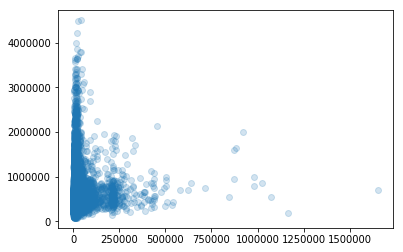

In [30]:
plt.scatter(df.sqft_lot,df.price, alpha = 0.2)
plt.show()

In [31]:
df = df.drop([1717])
df = df.drop([7640])
df = df.drop([7762])
df = df.drop([17305])

In [32]:
# there are only 3 properties with lot15 larger than 500 000 sqft
df.loc[df.sqft_lot15 > 500000]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9705,225079036,937500.0,4,4.0,5545,871200,2.0,0,3,11,3605,1940.0,2003,not renovated,98014,47.6760,-121.882,3420,871200
13451,3420069060,790000.0,3,2.5,2640,432036,1.5,3,3,10,2640,0.0,1996,not renovated,98022,47.1795,-122.036,1500,560617
20436,1125079111,1600000.0,4,5.5,6530,871200,2.0,2,3,11,6530,0.0,2008,not renovated,98014,47.6640,-121.878,1280,858132


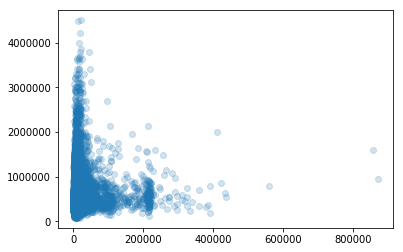

In [33]:
plt.scatter(df.sqft_lot15,df.price, alpha = 0.2)
plt.show()

In [34]:
df = df.drop([9705])
df = df.drop([13451])
df = df.drop([20436])

## Multicollinearity

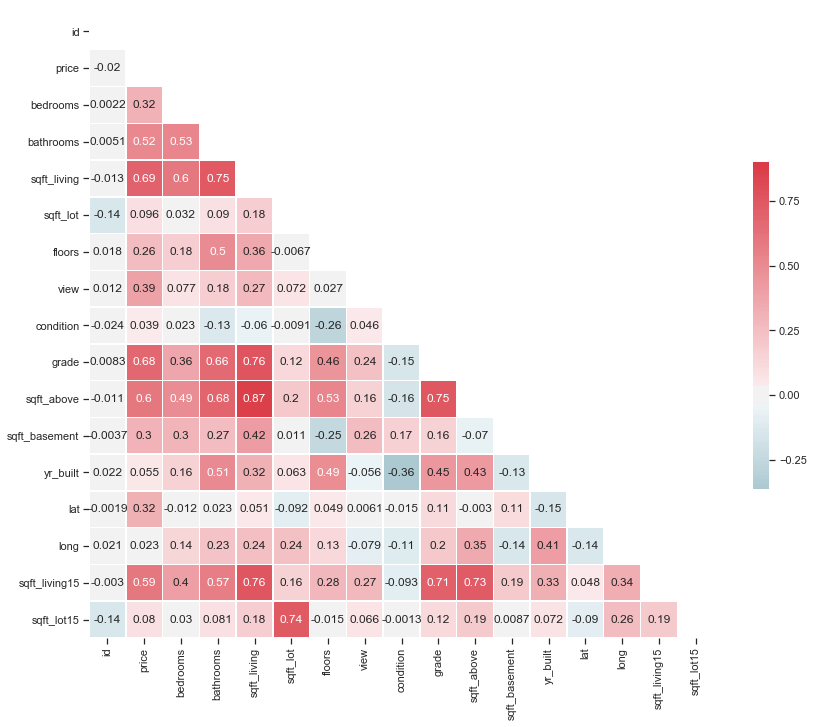

In [35]:
# checking for MULTICOLLINEARITY


sns.set(style="ticks")
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(14, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, annot=True,cbar_kws={"shrink": .5});

In [36]:
# columns 'sqft_living' and 'sqft_above' have correlation of 0.87
# looking at the 5 point statistics, their values seems to be roughly similar, they indeed look they describe the same
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,2.157600e+04,2.157600e+04,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000
mean,4.581116e+09,5.376951e+05,3.370551,2.113274,2075.702911,14753.897340,1.493813,0.231368,3.409854,7.654941,1785.424592,284.264043,1970.994809,47.560076,-122.214073,1985.301075,12615.373795
std,2.876457e+09,3.501127e+05,0.902949,0.762225,900.106965,36767.032445,0.539620,0.760893,0.650471,1.167740,817.852595,435.035649,29.370902,0.138550,0.140665,683.232348,25556.111824
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1426.500000,5040.000000,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,47.471075,-122.328000,1490.000000,5100.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1910.000000,7614.500000,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308950e+09,6.441250e+05,4.000000,2.500000,2550.000000,10656.750000,2.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,47.678025,-122.125000,2360.000000,10080.000000
max,9.900000e+09,4.500000e+06,11.000000,7.500000,7880.000000,982998.000000,3.500000,4.000000,5.000000,13.000000,7880.000000,2850.000000,2015.000000,47.777600,-121.315000,6210.000000,438213.000000


In [37]:
# I will therefore drop the 'sqft_above' column
df = df.drop('sqft_above',axis=1)

# I will also drop the ID column
df = df.drop('id',axis=1)

## Transforming numerical variables

In [38]:
#Log transforming data
#df.sqft_living = np.log(df.sqft_living)
#df.sqft_lot = np.log(df.sqft_lot)

#df.sqft_living15 = np.log(df.sqft_living15)
#df.sqft_lot15 = np.log(df.sqft_lot15)

#sqft_basement has zero values - what should I do with it?

In [39]:
#Standardisation/Normalisation
#all numerical columns: sqft_living,sqft_lot, sqft_living15, sqft_lot15
#df.sqft_living = (df.sqft_living - df.sqft_living.mean()) / df.sqft_living.std()
#df.sqft_lot = (df.sqft_lot - df.sqft_lot.mean()) / df.sqft_lot.std()

#df.sqft_lot15 = (df.sqft_lot15 - df.sqft_lot15.mean()) / df.sqft_lot15.std()
#df.sqft_living15 = (df.sqft_living15 - df.sqft_living15.mean()) / df.sqft_living15.std()

In [40]:
#experiment: transforming target variable
df.price = np.log(df.price)


In [41]:
#df.price = (df.price - df.price.mean()) / df.price.std()

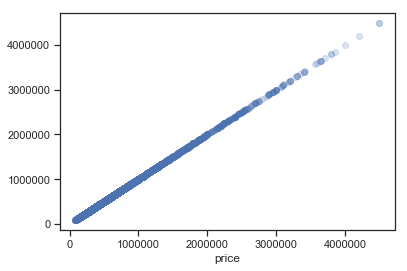

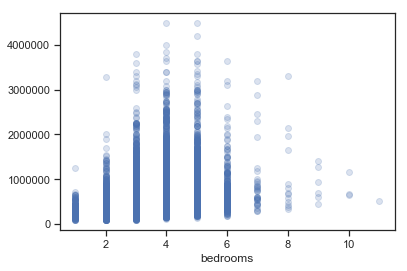

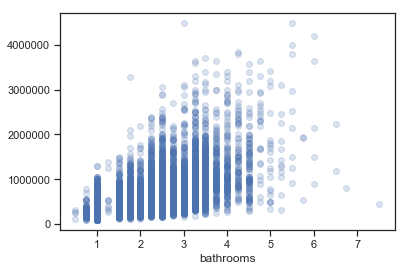

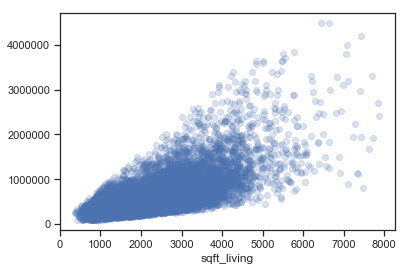

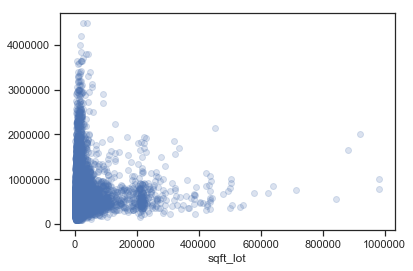

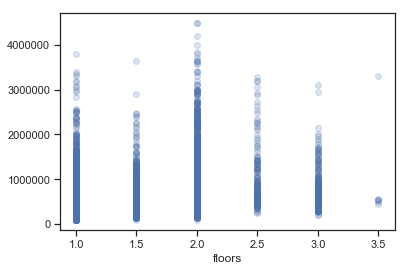

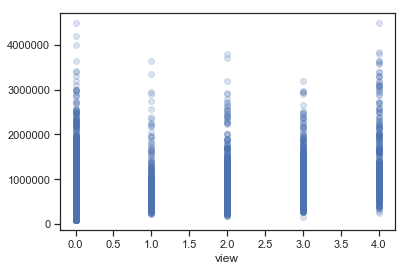

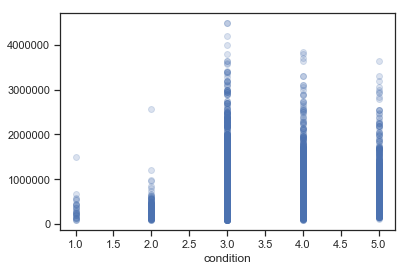

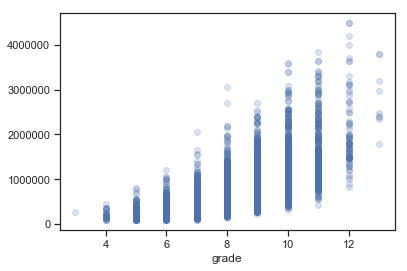

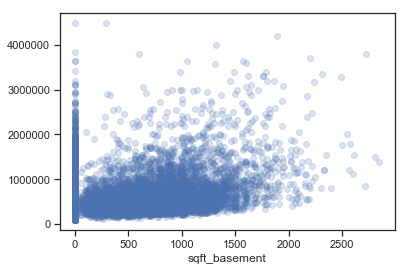

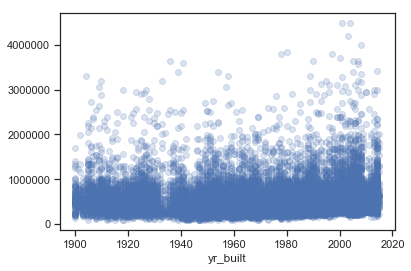

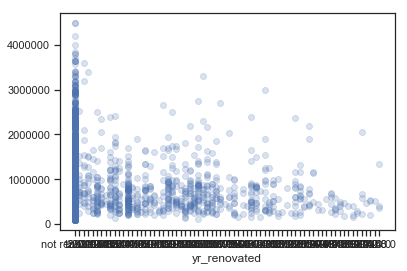

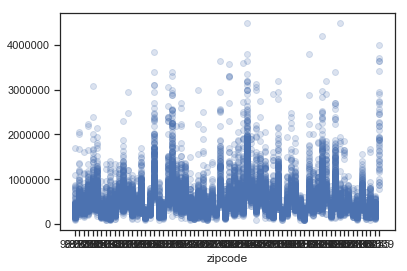

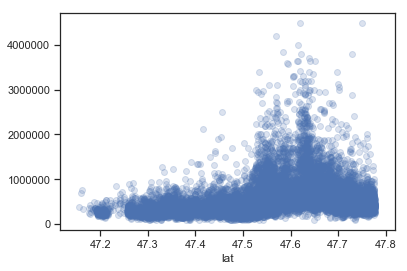

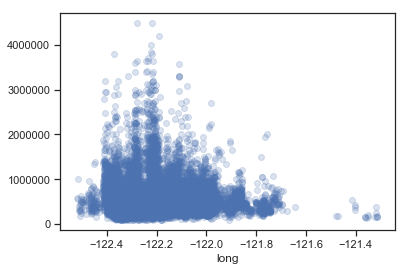

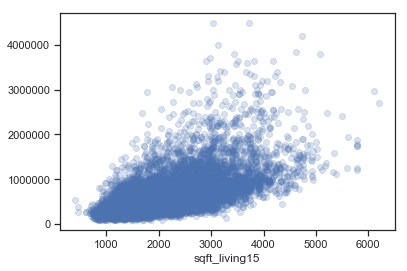

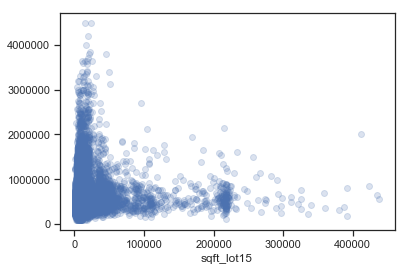

In [42]:
#TESTING ASSUMPTIONS FOR LINEAR REGRESSION

list_of_columns = list(df.columns)

for column in list_of_columns:
    plt.scatter(df[column],df.price, alpha =0.2)
    plt.xlabel(column)
    plt.show()

In [43]:
#observations
    #sqft_living does not seem very linear (exponential, perhaps?), also has some outliers
    #sqft_basement will be a categotical variable, as there are too many 0 values for properties without basement
    #the same applies for yr_renovated
    #lat has many outliers in terms of high price (350 000+), but has a slighly linear relationship
        #northern properties have generaly bigger value than southern
        # peak between 47.55 and 47.65
    #long does not have a linear relationship, value of properties peak at -122.2 and then decrease

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21576 entries, 0 to 21596
Data columns (total 17 columns):
price            21576 non-null float64
bedrooms         21576 non-null int64
bathrooms        21576 non-null float64
sqft_living      21576 non-null int64
sqft_lot         21576 non-null int64
floors           21576 non-null float64
view             21576 non-null int64
condition        21576 non-null int64
grade            21576 non-null int64
sqft_basement    21576 non-null float64
yr_built         21576 non-null int64
yr_renovated     21576 non-null object
zipcode          21576 non-null object
lat              21576 non-null float64
long             21576 non-null float64
sqft_living15    21576 non-null int64
sqft_lot15       21576 non-null int64
dtypes: float64(6), int64(9), object(2)
memory usage: 3.0+ MB


## Preparing categorical variables

In [45]:
#DEALING WITH CATEGORICAL VARIABLES
# bedrooms
# bathrooms
# floors
# view
# condition
# grade


for var in ['bedrooms','bathrooms','floors','view','condition','grade']:
    print (df[var].value_counts())

3     9823
4     6877
2     2759
5     1592
6      269
1      196
7       37
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64
2.50    5376
1.00    3849
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     730
3.25     587
3.75     155
4.00     135
4.50      99
4.25      78
0.75      71
4.75      23
5.00      20
5.25      12
5.50       9
1.25       9
6.00       5
0.50       4
5.75       3
6.50       2
7.50       1
6.75       1
Name: bathrooms, dtype: int64
1.0    10668
2.0     8223
1.5     1908
3.0      610
2.5      160
3.5        7
Name: floors, dtype: int64
0    19477
2      955
3      504
1      330
4      310
Name: view, dtype: int64
3    14007
4     5672
5     1699
2      169
1       29
Name: condition, dtype: int64
7     8973
8     6064
9     2615
6     2037
10    1132
11     394
5      241
12      83
4       27
13       9
3        1
Name: grade, dtype: int64


In [46]:
#columns condition, view, floors are distributed within less than 7 numbers - I will simply turn them into categories now
#I will also add zipcode
df.condition = df.condition.astype('category')
df.view = df.view.astype('category')
df.floors = df.floors.astype('category')
df.zipcode = df.zipcode.astype('category')

#creating dummy columns
condition_dummies = pd.get_dummies(df.condition,prefix='cond')
view_dummies = pd.get_dummies(df.view,prefix='view')
floors_dummies = pd.get_dummies(df.floors,prefix='flo')
zipcode_dummies = pd.get_dummies(df.zipcode,prefix='zip')

#removing original columns
df = df.drop(["condition","view","floors","zipcode"], axis=1)

#adding dummy columns
df = pd.concat([df, condition_dummies, view_dummies, floors_dummies, zipcode_dummies], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21576 entries, 0 to 21596
Data columns (total 99 columns):
price            21576 non-null float64
bedrooms         21576 non-null int64
bathrooms        21576 non-null float64
sqft_living      21576 non-null int64
sqft_lot         21576 non-null int64
grade            21576 non-null int64
sqft_basement    21576 non-null float64
yr_built         21576 non-null int64
yr_renovated     21576 non-null object
lat              21576 non-null float64
long             21576 non-null float64
sqft_living15    21576 non-null int64
sqft_lot15       21576 non-null int64
cond_1           21576 non-null uint8
cond_2           21576 non-null uint8
cond_3           21576 non-null uint8
cond_4           21576 non-null uint8
cond_5           21576 non-null uint8
view_0           21576 non-null uint8
view_1           21576 non-null uint8
view_2           21576 non-null uint8
view_3           21576 non-null uint8
view_4           21576 non-null uint8
flo_1.

In [47]:
#turning yr_renoved into numerical
#I am replacing the 'not renovated' values into the corresponding 'yr_built value'.
#This columns now represent the age of the house taking into consideration renovations
#The Person's correlation coefficient is now 0.93! I will drop the 'yr_built' category now.
df.yr_renovated.value_counts()
df.loc[df.yr_renovated == 'not renovated','yr_renovated'] = df['yr_built']
df.yr_renovated = df.yr_renovated.astype('float64')



In [48]:
df = df.drop('yr_built', axis = 1)

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


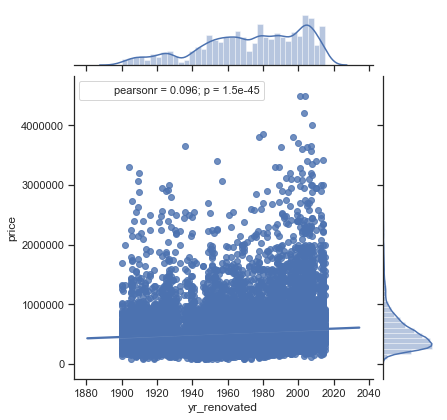

In [49]:
from scipy.stats import pearsonr
sns.jointplot(x='yr_renovated', y='price', data=df, kind = 'reg', stat_func=pearsonr)

In [50]:
df.bedrooms = df.bedrooms.astype('float64')
df.grade = df.grade.astype('float64')

bedrooms_bins = [0,2,3,4,5,11]
bathrooms_bins = [0,1,2,3,4,5,8]
grade_bins = [0,6,7,8,9,10,11,14]

yr_renovated_bins = [1900,1920,1940,1960,1980,2000,2010,2020]
sqft_basement_bins = [0,500,1000,6000]

In [51]:
# using pd.cut
bins_bedrooms = pd.cut(df['bedrooms'], bedrooms_bins)
bins_bathrooms = pd.cut(df['bathrooms'], bathrooms_bins)
bins_grade = pd.cut(df['grade'], grade_bins)


bins_yr_renovated = pd.cut(df['yr_renovated'], yr_renovated_bins)
bins_sqft_basement = pd.cut(df['sqft_basement'], sqft_basement_bins)

In [52]:
# using pd.cut returns unordered categories. Transform this to ordered categories.
bins_bedrooms = bins_bedrooms.cat.as_unordered()
bins_bathrooms = bins_bathrooms.cat.as_unordered()
bins_grade = bins_grade.cat.as_unordered()

bins_yr_renovated = bins_yr_renovated.cat.as_unordered()

bins_sqft_basement = bins_sqft_basement.cat.as_unordered()

In [53]:
# replace the existing columns
df['bedrooms']=bins_bedrooms
df['bathrooms']=bins_bathrooms
df['grade']=bins_grade


df['yr_renovated']=bins_yr_renovated

df['sqft_basement'] = bins_sqft_basement

In [54]:
#LABEL ENCODING

df['bedrooms'] = df['bedrooms'].cat.codes
df['bathrooms'] = df['bathrooms'].cat.codes
df['grade'] = df['grade'].cat.codes

df['yr_renovated'] = df['yr_renovated'].cat.codes

df['sqft_basement'] = df['sqft_basement'].cat.codes

In [55]:
#CREATING DUMMY VARIABLES

bathrooms_dummy = pd.get_dummies(df['bathrooms'], prefix="bath")
bedrooms_dummy = pd.get_dummies(df['bedrooms'], prefix="bed")
grade_dummy = pd.get_dummies(df['grade'], prefix="grade")


yr_renovated_dummy = pd.get_dummies(df['yr_renovated'], prefix="reno")

sqft_basement_dummy = pd.get_dummies(df['sqft_basement'], prefix= "base")

In [56]:
add_series = [df,bathrooms_dummy, bedrooms_dummy, grade_dummy, sqft_basement_dummy,yr_renovated_dummy]
df = pd.concat(add_series, axis=1)


In [57]:
#removing original columns
df = df.drop(["bedrooms","bathrooms","grade", "yr_renovated","sqft_basement"], axis=1)


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21576 entries, 0 to 21596
Columns: 123 entries, price to reno_6
dtypes: float64(3), int64(4), uint8(116)
memory usage: 4.3 MB


In [59]:
df.bed_0.head()

0    0
1    0
2    1
3    0
4    0
Name: bed_0, dtype: uint8

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21576 entries, 0 to 21596
Columns: 123 entries, price to reno_6
dtypes: float64(3), int64(4), uint8(116)
memory usage: 4.3 MB


# 3) Modeling data

In [61]:
#RENAMING FLOORS COLUMNS

df = df.rename(columns={'flo_1.0': 'flo10','flo_1.5': 'flo15','flo_2.0': 'flo20','flo_2.5': 'flo25','flo_3.0': 'flo30','flo_3.5': 'flo35'})

In [62]:
df = df.rename(columns={'base_-1':'baseminus1','base_0':'base0','base_1':'base1','base_2':'base2'})


In [63]:
df = df.rename(columns={'reno_-1':'renominus1','reno_0':'reno0','reno_1':'reno1','reno_2':'reno2','reno_3':'reno3','reno_4':'reno4','reno_5':'reno5','reno_6':'reno6'})

In [64]:
df = df.rename(columns={'bed_-1':'bedminus1'})

In [65]:
len(df.columns)

123

In [66]:
# intial run (outliers removed) 0.824, 0.823
# with outliers: 0.816, 0.815
# after removing id column: 0.826
# after removing houses above £5 mil 0.826,0.825
# after transforming target variable: 0.885, 0.885
# without creating cat variables 0.879
# without zipcodes 0.775

In [67]:
df = df.drop('long', axis =1)

# dropping these variables imporoved the distributions of my residual errors

In [68]:
df = df.drop('cond_5',axis=1)
df = df.drop('view_4',axis=1)
df = df.drop('flo35',axis=1)
df = df.drop('bath_5',axis=1)
df = df.drop('bed_4',axis=1)
df = df.drop('grade_6',axis=1)
df = df.drop('base2',axis=1)
df = df.drop('reno6',axis=1)

In [69]:
df = df.drop('lat', axis = 1)
#df = df.drop('sqft_living15', axis = 1)
#df = df.drop('sqft_lot15', axis = 1)
#df = df.drop('sqft_lot', axis = 1)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21576 entries, 0 to 21596
Columns: 113 entries, price to reno5
dtypes: float64(1), int64(4), uint8(108)
memory usage: 3.2 MB


In [71]:
from statsmodels.formula.api import ols

outcome = 'price'
predictors = df.drop('price', axis=1)

pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [72]:
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     938.7
Date:                Mon, 17 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:42:45   Log-Likelihood:            -2.8699e+05
No. Observations:               21576   AIC:                         5.742e+05
Df Residuals:                   21464   BIC:                         5.751e+05
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.65e+06   6.41e+04     25.716      0.000    1.52e+06    1.78e+06
sqft_living     147.0233      2.856     51.482      0.000     141.426     152.621
sqft_lot          0.3484      0.041      8.557      0.000       0.269       0.428
sqft_living15    22.1318      2.673      8.279      0.000      16.892      27.372
sqft_lot15       -0.1347      0.060     -2.227      0.026      -0.253      -0.016
cond_1        -1.721e+05   2.74e+04     -6.282      0.000   -2.26e+05   -1.18e+05
cond_2        -8.157e+04   1.18e+04     -6.885      0.000   -1.05e+05   -5.84e+04
cond_3        -7.496e+04   4108.606    -18.244      0.000    -8.3e+04   -6.69e+04
cond_4        -4.768e+04   4111.424    -11.597      0.000   -5.57e+04   -3.96e+04
view_0        -5.258e+05   8751.696    -60.076      0.000   -5.43e+05   -5.09e+05
view_1         -4.32e+05   1.16e+04    -37.113      0.000   -4.55e+05   -4.09e+05
view_2        -4.499e+05   9647.548    -46.632      0.000   -4.69e+05   -4.31e+05
view_3        -3.595e+05   1.06e+04    -33.984      0.000    -3.8e+05   -3.39e+05
flo10         -2.038e+04   5.52e+04     -0.369      0.712   -1.29e+05    8.78e+04
flo15         -3.132e+04   5.53e+04     -0.567      0.571    -1.4e+05     7.7e+04
flo20         -5.049e+04   5.51e+04     -0.916      0.360   -1.58e+05    5.75e+04
flo25          2.947e+04   5.63e+04      0.524      0.600   -8.08e+04     1.4e+05
flo30         -1.059e+05   5.53e+04     -1.915      0.055   -2.14e+05    2467.561
zip_98001     -1.808e+05   7754.201    -23.314      0.000   -1.96e+05   -1.66e+05
zip_98002     -1.725e+05   1.04e+04    -16.661      0.000   -1.93e+05   -1.52e+05
zip_98003     -1.796e+05   8757.556    -20.511      0.000   -1.97e+05   -1.62e+05
zip_98004      5.765e+05   8380.311     68.790      0.000     5.6e+05    5.93e+05
zip_98005      1.389e+05   1.13e+04     12.267      0.000    1.17e+05    1.61e+05
zip_98006      7.129e+04   6841.048     10.420      0.000    5.79e+04    8.47e+04
zip_98007      8.867e+04   1.22e+04      7.255      0.000    6.47e+04    1.13e+05
zip_98008      1.014e+05   8748.613     11.596      0.000    8.43e+04    1.19e+05
zip_98010     -1.166e+05   1.45e+04     -8.022      0.000   -1.45e+05   -8.81e+04
zip_98011     -3.597e+04   1.04e+04     -3.447      0.001   -5.64e+04   -1.55e+04
zip_98014     -7.773e+04   1.34e+04     -5.816      0.000   -1.04e+05   -5.15e+04
zip_98019     -8.316e+04   1.07e+04     -7.807      0.000   -1.04e+05   -6.23e+04
zip_98022     -1.948e+05   9805.973    -19.862      0.000   -2.14e+05   -1.76e+05
zip_98023     -2.002e+05   6701.952    -29.871      0.000   -2.13e+05   -1.87e+05
zip_98024     -3.021e+04   1.64e+04     -1.846      0.065   -6.23e+04    1875.147
zip_98027     -1.121e+04   7326.531     -1.530      0.126   -2.56e+04    3151.267
zip_98028     -4.346e+04   8680.998     -5.006   

In [73]:
#removing these features from the dataset based on their high p-value did not produce any difference in R-squared
#high_p_values = ['id', 'lat', 'sqft_lot15', 'zip_98102', 'zip_98119']
#df_reduced = df.drop(high_p_values, axis=1)
#Skew: -0.2 symmetrical
#Kurtosis: 5.7 - high, leptokurtic, sign of outliers?

In [74]:
df.describe()

,price,sqft_living,sqft_lot,sqft_living15,sqft_lot15,cond_1,cond_2,cond_3,cond_4,view_0,...,baseminus1,base0,base1,renominus1,reno0,reno1,reno2,reno3,reno4,reno5
count,2.157600e+04,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,...,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000,21576.000000
mean,5.376951e+05,2075.702911,14753.897340,1985.301075,12615.373795,0.001344,0.007833,0.649194,0.262885,0.902716,...,0.615221,0.121709,0.179042,0.003430,0.059789,0.074481,0.189006,0.226919,0.220291,0.168938
std,3.501127e+05,900.106965,36767.032445,683.232348,25556.111824,0.036638,0.088158,0.477234,0.440211,0.296351,...,0.486554,0.326957,0.383396,0.058465,0.237100,0.262558,0.391523,0.418849,0.414452,0.374706
min,7.800000e+04,370.000000,520.000000,399.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,1426.500000,5040.000000,1490.000000,5100.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,1910.000000,7614.500000,1840.000000,7620.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.441250e+05,2550.000000,10656.750000,2360.000000,10080.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.500000e+06,7880.000000,982998.000000,6210.000000,438213.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Regression Assumption Testing

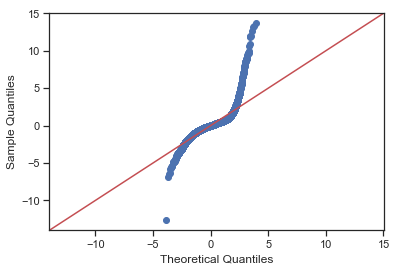

In [75]:
# Normality assumption
# the normality assumption talks about the model residuals and not about the distributions of the variables

residuals = model.resid
residuals_plot = sm.graphics.qqplot(residuals, dist=stats.norm, line ='45', fit=True)



In [76]:
# Normal Q-Q plots that exhibit this behavior usually mean your data have more extreme values than would be expected


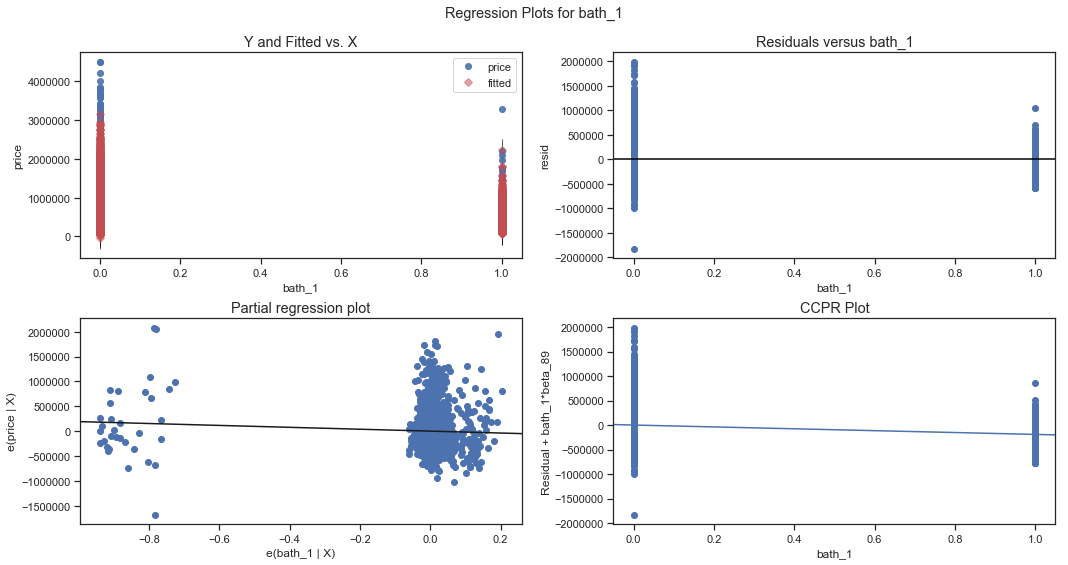

In [77]:


fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'bath_1', fig=fig)
plt.show()

#heteroscedastic: lat,long

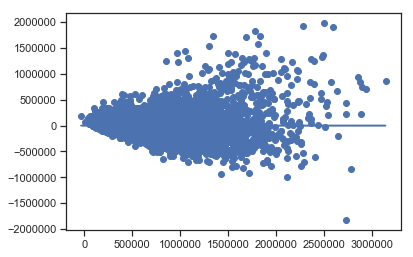

In [78]:
x_cols = df.columns
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))])
#overall, the model seems homoscedastic
#some large errors below -2 price

# 4) Model Validation

In [79]:
#inspect which 5 variables explain .3 of prices!
#perhaps drop a columns for each category?
#https://www.datacamp.com/community/tutorials/feature-selection-python

In [80]:
# When using a train test split, we'll compare your residuals for both test set and training set
# A big difference in value between the test and training set (R)MSE is an indication of overfitting

## train-test-split with Scikit-learn

In [81]:
y = subset[["price"]]
X = subset.drop(["price"], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(len(X_train), len(X_test), len(y_train), len(y_test))

NameError: name 'subset' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

#linreg.predict will plot create a new variable y_hat with contains the predicted house prices based on our 
#training and testing models

In [ ]:
# this equation takes in the the differences between the predicted and the original value**2,
# divides them by the number of observations and sums them up = MSE
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('TRAIN Mean Squarred Error:', mse_train)
print('TEST Mean Squarred Error:', mse_test)

In [ ]:
print('Difference between train and test MSE:', mse_test-mse_train)

## cross-validation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
import matplotlib.pyplot as plt

num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

## K-fold cross validation

In [ ]:
# I will not perform the K-fold cross validation, which takes in combinations of testing and training data
# across entire dataset. This way we test all data against its remaining data.
# Cross-validation MSE = average of individual results

from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))


In [ ]:
k_fold_result = abs(cv_5_results)

In [ ]:
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.scatter(11,k_fold_result,color='red')
plt.legend();                                   


In [82]:
np.exp(0.4)

1.4918246976412703